<h1 style="text-align:center; color:#ff6b6b; font-size:30px;"><strong>Project 3</strong></h1>

<h2 style="text-align:center; color:#ff6b6b; font-size:20px;">Dengue Case Analysis</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets\\dengue.csv')
data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [4]:
data["Year"] = data["Year"].astype('int64')

In [5]:
data.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
data.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>SAMPLE GRAPH</h1>

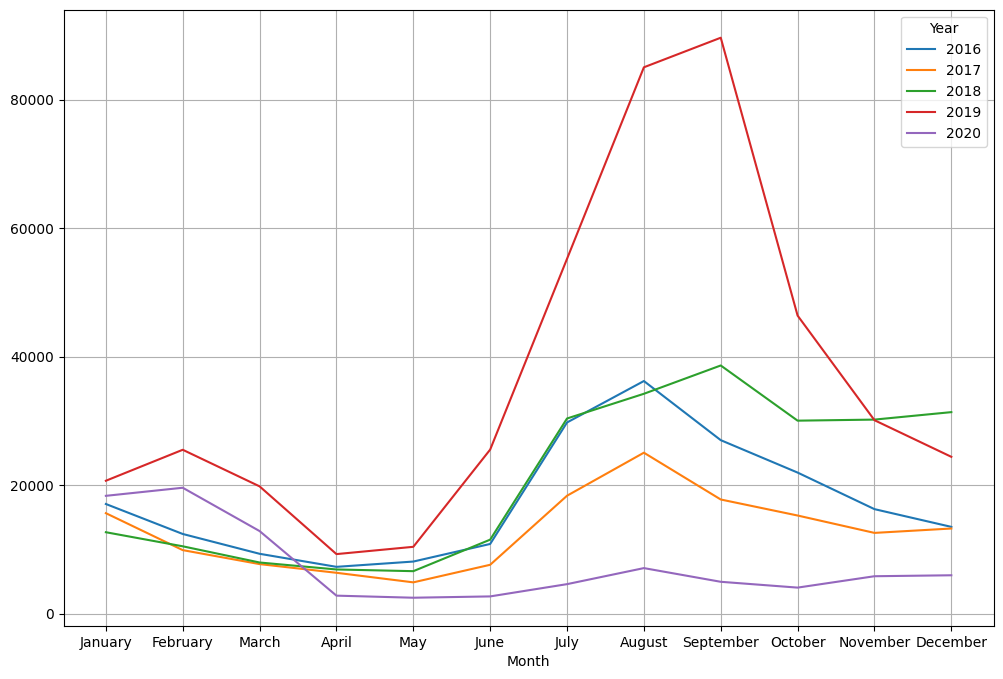

In [7]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

monthly_cases = data.groupby([data.Month, data.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h1>Visualization and Insights</h1>

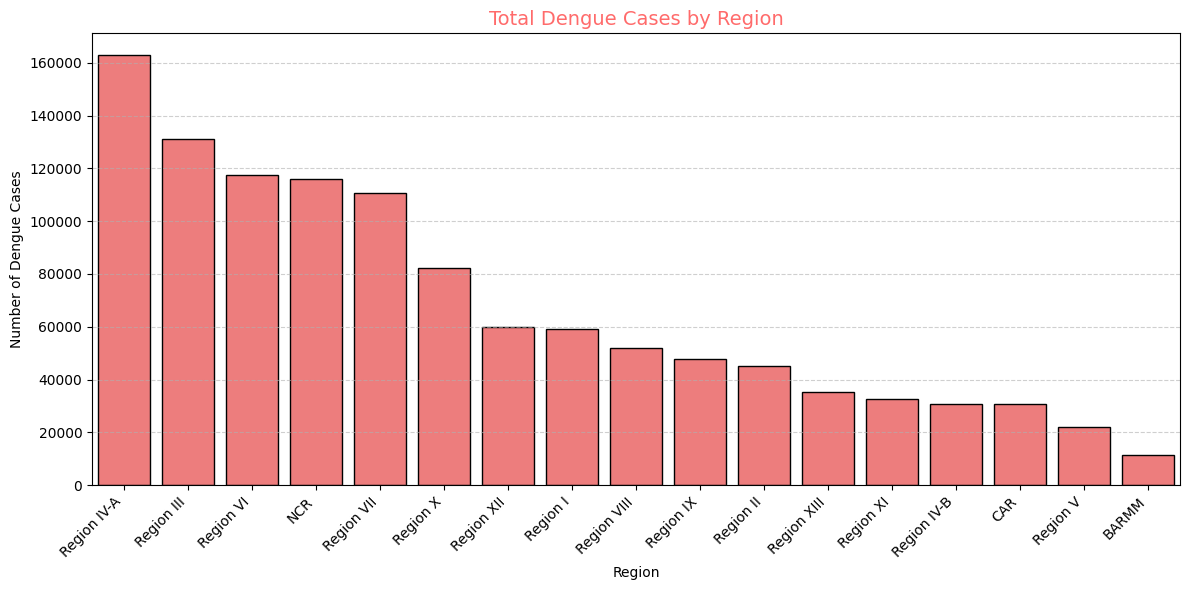

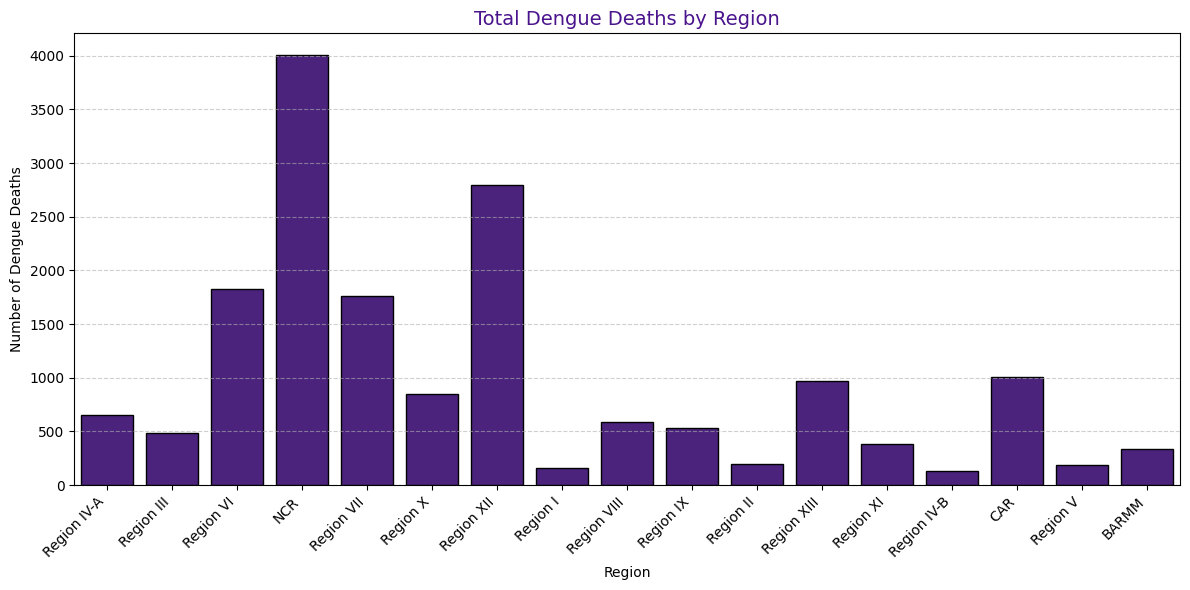

,Region,Dengue_Cases,Dengue_Deaths
0,BARMM,11537,332
1,CAR,30582,1008
2,NCR,115966,4008
3,Region I,59066,157
4,Region II,45141,193
5,Region III,131064,482
6,Region IV-A,163029,652
7,Region IV-B,30849,130
8,Region IX,47781,532
9,Region V,22167,185


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

region_summary = data.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

region_order = region_summary.sort_values('Dengue_Cases', ascending=False)['Region']

plt.figure(figsize=(12,6))
sns.barplot(
    data=region_summary,
    x='Region',
    y='Dengue_Cases',
    order=region_order,
    color='#ff6b6b',
    edgecolor='black'
)
plt.title("Total Dengue Cases by Region", fontsize=14, color='#ff6b6b')
plt.xlabel("Region")
plt.ylabel("Number of Dengue Cases")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(
    data=region_summary,
    x='Region',
    y='Dengue_Deaths',
    order=region_order,
    color='#4a148c',
    edgecolor='black'
)
plt.title("Total Dengue Deaths by Region", fontsize=14, color='#4a148c')
plt.xlabel("Region")
plt.ylabel("Number of Dengue Deaths")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

region_summary


<h3>Insight 1: Region IV-A has the highest number of dengue cases (163,029), followed by Region III (131,064) and Region VI (117,523). This shows that areas with larger populations and urban centers tend to have more dengue cases.</h3>

<h3>Insight 2: NCR (National Capital Region) has fewer total cases than Region IV-A but has the highest number of deaths (4,008). This could mean that dengue cases in NCR were more severe or that access to treatment was lower.</h3>

<h3>Insight 3: Regions with fewer cases like BARMM and Region IX still reported several deaths, showing that dengue remains a serious health risk even in areas with lower case counts.</h3>

<h2>Q1: What is the fatality rate based on the total Dengue Cases?</h2>

In [9]:
total_cases = data['Dengue_Cases'].sum()
total_deaths = data['Dengue_Deaths'].sum()

fatality_rate = (total_deaths / total_cases) * 100

print(f"Total Dengue Cases: {total_cases:,}")
print(f"Total Dengue Deaths: {total_deaths:,}")
print(f"Fatality Rate: {fatality_rate:.2f}%")

Total Dengue Cases: 1,147,425
Total Dengue Deaths: 16,844
Fatality Rate: 1.47%


<h3>Insight 4: Based on the total cases and deaths, the fatality rate is 1.47%. This is quite low considering the total case reached 1,147,425, and the total deaths reached 16,844. Meaning the majority of those people who got dengue has been treated and recovered.</h3>

<h2>Q2: What Year has the highest fatality rate based on the total Dengue Cases?</h2>

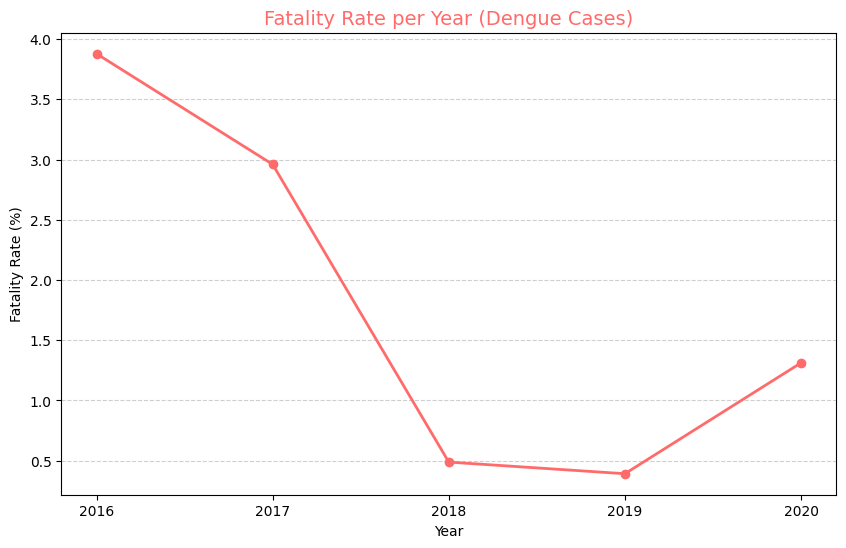

,Dengue_Cases,Dengue_Deaths,Fatality Rate (%)
Year,,,
2016,209544,8127,3.878422
2017,154155,4563,2.960008
2018,250783,1226,0.488869
2019,441902,1733,0.392168
2020,91041,1195,1.312595


In [10]:
fatality_year = data.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()

fatality_year['Fatality Rate (%)'] = (fatality_year['Dengue_Deaths'] / fatality_year['Dengue_Cases']) * 100

plt.figure(figsize=(10,6))
plt.plot(fatality_year.index, fatality_year['Fatality Rate (%)'], marker='o', color='#ff6b6b', linewidth=2)
plt.title("Fatality Rate per Year (Dengue Cases)", fontsize=14, color='#ff6b6b')
plt.xlabel("Year")
plt.ylabel("Fatality Rate (%)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fatality_year.index)
plt.show()

fatality_year


<h3>Insight 5: Based on the line graph, the highest fatality rate in terms of year is 2016 with fatality rate reaching 3.87%. The second to the highest being year 2017 with 2.96%.</h3>

<h3>Insight 6: The fatality rate went down a lot from 2016 to 2019, showing better control and treatment of dengue. But in 2020, there was a small increase, which means there were still some issues in keeping the numbers low.</h3>

<h2>Q3: Based on Each Year, is there any correlation of Month and Dengue Cases?</h2>

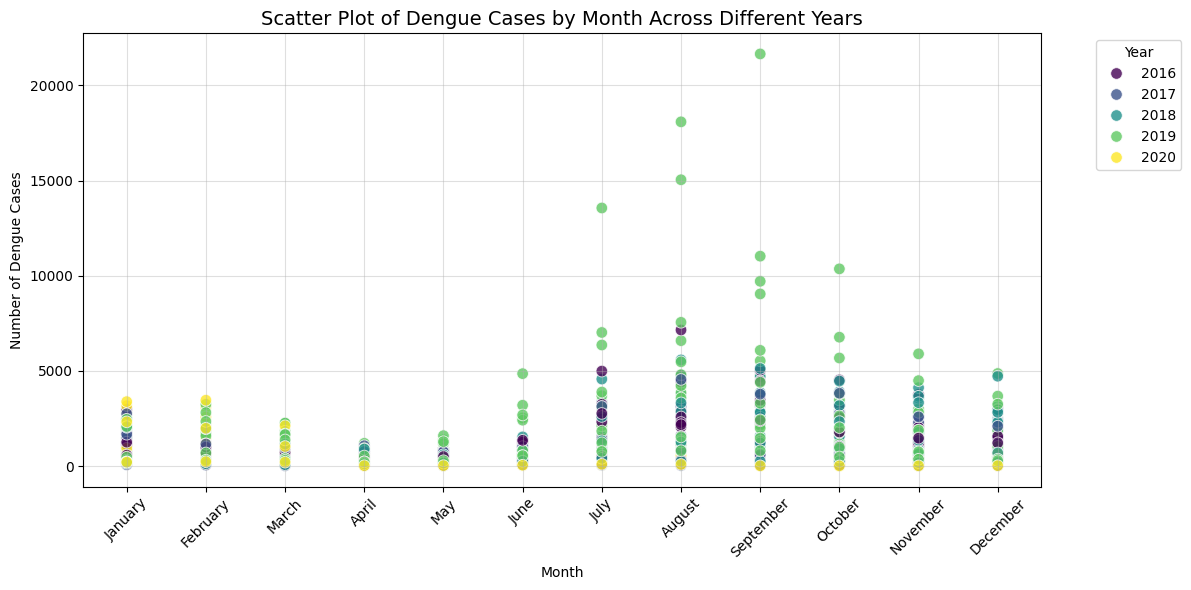

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Month column is ordered properly
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Plot: Scatter plot for each year
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='Month',
    y='Dengue_Cases',
    hue='Year',
    palette='viridis',
    s=70,
    alpha=0.8
)

plt.title("Scatter Plot of Dengue Cases by Month Across Different Years", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Dengue Cases")
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<h3>Insight 7: Yes, there is a clear correlation between the month and dengue cases. The scatter plot shows that dengue cases usually rise around the middle of the year, especially from June to September, showing that certain months are more prone to outbreaks.</h3>

<h3>Insight 8: The high number of cases during these months may be linked to the rainy season, where mosquitoes breed more easily, leading to a higher chance of dengue transmission.</h3>

<h2>Q4. Is there any changes of the amount of cases per region over the years?</h2>

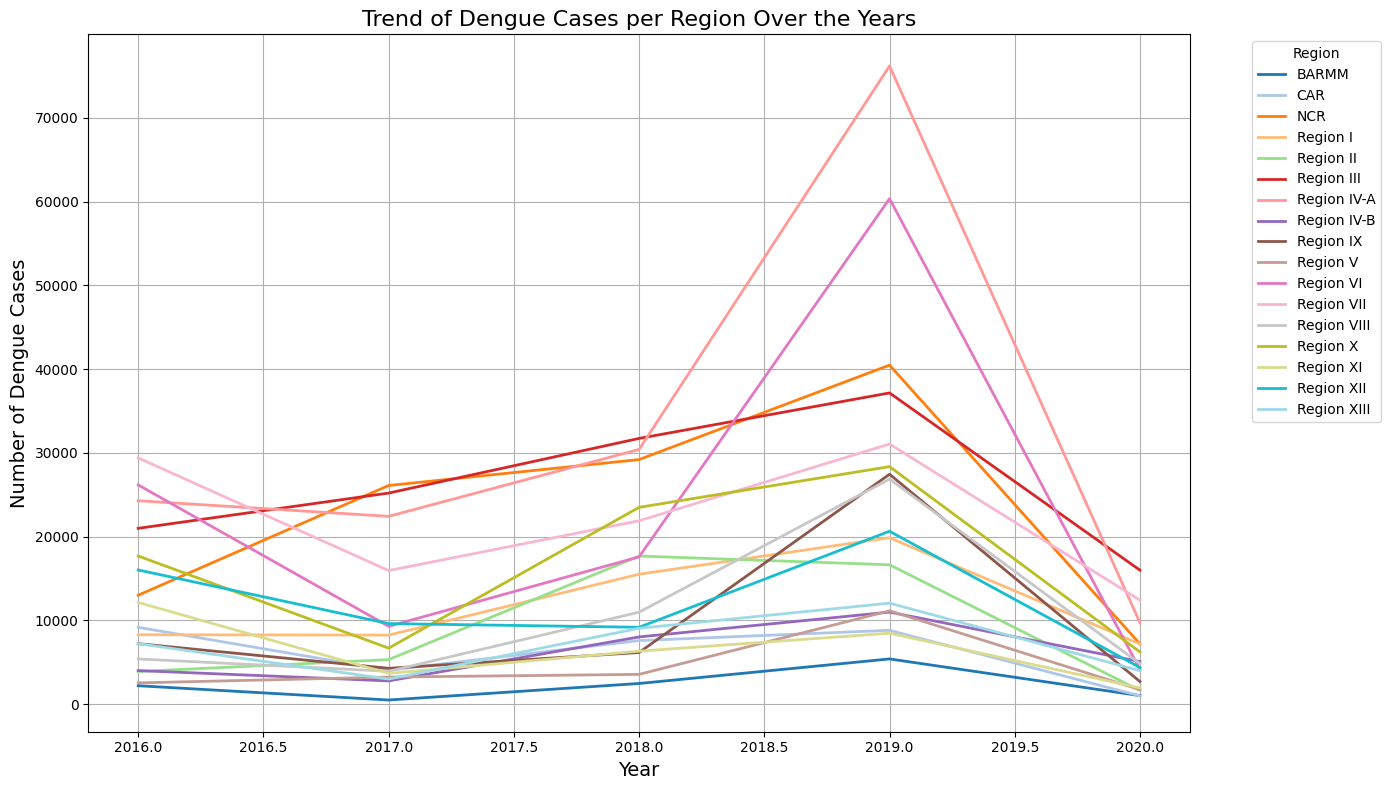

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Year and Region
yearly_cases = data.groupby(['Year', 'Region'])['Dengue_Cases'].sum().unstack()

# Plot directly with a bigger figure size and unique colors
ax = yearly_cases.plot(kind='line', colormap='tab20', linewidth=2, figsize=(14, 8))

# Add labels, title, and grid
plt.title('Trend of Dengue Cases per Region Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Dengue Cases', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

<h3>Insight 9: From 2016 to 2018, most regions showed a steady growth in dengue cases. This slow and consistent rise could mean that the spread of dengue was becoming more widespread each year, possibly due to changing weather patterns, poor sanitation in some areas, or lack of strict preventive actions.</h3>

<h3>Insight 10: The year 2019 showed a clear spike in dengue cases across almost all regions, meaning that this year had the most noticeable increase in infections compared to the others.</h3>

<h3>Insight 11: After the 2019 peak, dengue cases dropped sharply in 2020 in nearly every region. This sudden decrease could be linked to several reasons, such as stronger health responses after the 2019 outbreak or the COVID-19 pandemic, which led to lockdowns and reduced outdoor movement, possibly limiting mosquito exposure. The drop shows that environmental or behavioral changes can strongly affect dengue transmission rates.</h3>

<h1>Linear Regression Example</h1>

In [17]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import sklearn

In [19]:
data['Month'] = data['Month'].astype('str')

In [21]:
# Combine Month and Year into a Date column
data['Date'] = pd.to_datetime(data['Month'] + ' ' + data['Year'].astype(str))

# Optional: sort by date
data = data.sort_values('Date')

In [22]:
region4_df = data[data['Region'] == 'Region IV-A']
monthly_cases = region4_df.groupby('Date')['Dengue_Cases'].sum().reset_index()


In [23]:
monthly_cases

,Date,Dengue_Cases
0,2016-01-01,2993
1,2016-02-01,2035
2,2016-03-01,1327
3,2016-04-01,838
4,2016-05-01,714
5,2016-06-01,778
6,2016-07-01,2270
7,2016-08-01,3218
8,2016-09-01,3454
9,2016-10-01,3175


In [24]:
from sklearn.linear_model import LinearRegression

# Convert dates to ordinal for regression
#monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(lambda x: x.toordinal())
#other 
monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(pd.Timestamp.toordinal)

# # Reshape for sklearn
X = monthly_cases['Date_Ordinal'].values.reshape(-1, 1)
y = monthly_cases['Dengue_Cases'].values

# # Fit model
model = LinearRegression()
model.fit(X, y)

# # Predict
monthly_cases['Predicted_Cases'] = model.predict(X)

# # Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")


The model explains 1.7% of the variation in dengue cases.
